# 1D Redshifts with Bayesian Neural Network
Tuan Do, 2021-06-19

Based on Evan's example_error_producer.py

In [8]:
#goal: provide basic implementation of deep learning NN for general application
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
import tensorflow_probability as tfp
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import pandas as pd
#import data set
import numpy as np
mnist = tf.keras.datasets.mnist
import random
from tensorboard.plugins.hparams import api as hp
import datetime
from tensorflow import keras
from sklearn.model_selection import train_test_split
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
from sklearn import ensemble
from sklearn import linear_model
import tensorflow as tf
import tensorflow_probability as tfp
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import pandas as pd
#import data set
import numpy as np
import random
from sklearn.model_selection import train_test_split
tfd = tfp.distributions

#import photoz data:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print("GPUs Available: ", len(physical_devices))
#if physical_devices:
#   tf.config.experimental.set_memory_growth(physical_devices[0], True)

import matplotlib
%matplotlib inline
font = {        'size'   : 20}
matplotlib.rc('font', **font)


Num GPUs Available:  1
GPUs Available:  1


In [2]:

#import photoz data:
tfd = tfp.distributions
#from google.colab import files

photozdata = pd.read_csv('/data/HSC/HSC_IMAGES_FIXED/HSC_photozdata_full_header_trimmed.csv')
spectro_z = np.asarray(photozdata["specz_redshift"])


col1 = np.asarray(photozdata["g_cmodel_mag"])
col2 = np.asarray(photozdata["r_cmodel_mag"])
col3 = np.asarray(photozdata["i_cmodel_mag"])
col4 =np.asarray(photozdata["z_cmodel_mag"])
col5 = np.asarray(photozdata["y_cmodel_mag"])

In [3]:
spectro_z.shape

(52591,)

In [4]:
photozdata.shape

(52591, 22)

In [5]:
photozdata.head()

,object_id_1,ra,dec,coord,skymap_id,g_cmodel_mag,r_cmodel_mag,i_cmodel_mag,z_cmodel_mag,y_cmodel_mag,...,i_cmodel_magsigma,z_cmodel_magsigma,y_cmodel_magsigma,object_id_2,specz_redshift_err,specz_redshift,specz_mag_i,specz_name,specz_ra,specz_dec
0,3.640710e+16,29.056840,-6.577962,"'(179117.015625, 99518.6015625, -23628.67578125)'",82780005,22.837498,21.159600,19.852673,19.388730,19.089922,...,0.004001,0.006953,0.007002,3.640710e+16,0.00030,0.69359,19.652,SDSS-DR12-1237679340566217300,29.056771,-6.577981
1,3.641160e+16,30.350384,-6.107037,"'(176986.390625, 103631.3828125, -21943.728515...",82790107,22.242287,21.505087,20.884990,20.588097,20.394600,...,0.002920,0.004457,0.007763,3.641160e+16,0.00033,0.68736,20.907,SDSS-DR12-1237679341103677901,30.350340,-6.107040
2,3.641140e+16,30.558539,-6.526887,"'(176465.515625, 104189.1328125, -23446.0078125)'",82790005,22.436127,21.514544,21.500206,20.762743,20.606396,...,0.004906,0.004987,0.009204,3.641140e+16,0.00073,3.35212,20.885,SDSS-DR12-1237679340566872600,30.558516,-6.526930
3,3.641160e+16,30.383171,-6.169957,"'(176906.15625, 103720.390625, -22168.94140625)'",82790107,22.804676,22.235598,21.882067,21.826208,21.726620,...,0.006623,0.010950,0.024310,3.641160e+16,0.03137,0.92066,21.729,SDSS-DR12-1237679439886287299,30.383171,-6.169992
4,3.641170e+16,30.200514,-6.105444,"'(177257.375, 103168.3828125, -21938.025390625)'",82790207,22.178066,21.270580,20.574970,20.477303,19.997612,...,0.001957,0.003098,0.004146,3.641170e+16,0.00146,4.03498,20.028,SDSS-DR12-1237679341103612342,30.200520,-6.105411


In [48]:
photozdata.columns

Index(['object_id_1', 'ra', 'dec', 'coord', 'skymap_id', 'g_cmodel_mag',
       'r_cmodel_mag', 'i_cmodel_mag', 'z_cmodel_mag', 'y_cmodel_mag',
       'g_cmodel_magsigma', 'r_cmodel_magsigma', 'i_cmodel_magsigma',
       'z_cmodel_magsigma', 'y_cmodel_magsigma', 'object_id_2',
       'specz_redshift_err', 'specz_redshift', 'specz_mag_i', 'specz_name',
       'specz_ra', 'specz_dec'],
      dtype='object')

Text(0, 0.5, 'N Galaxies')

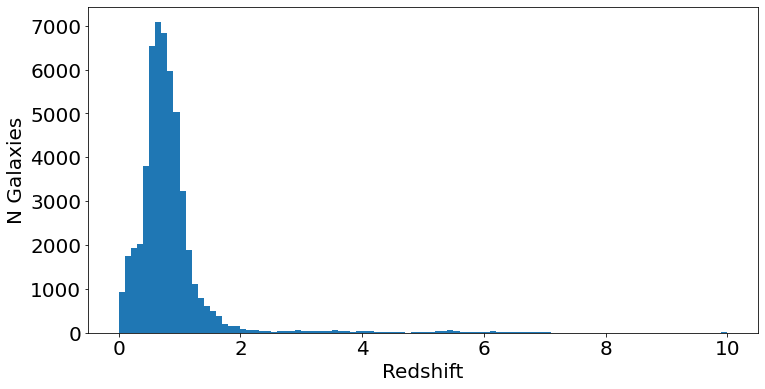

In [10]:
plt.figure(figsize=(12,6))
n,bins,patches = plt.hist(spectro_z,bins=100)
plt.xlabel('Redshift')
plt.ylabel('N Galaxies')

In [12]:
# look at the properties of stars with redshift greater than 6
photozdata[photozdata['specz_redshift']>6]

,object_id_1,ra,dec,coord,skymap_id,g_cmodel_mag,r_cmodel_mag,i_cmodel_mag,z_cmodel_mag,y_cmodel_mag,...,i_cmodel_magsigma,z_cmodel_magsigma,y_cmodel_magsigma,object_id_2,specz_redshift_err,specz_redshift,specz_mag_i,specz_name,specz_ra,specz_dec
16,3.641610e+16,31.734715,-6.610750,"'(174260.3125, 107771.2734375, -23745.93359375)'",82800204,23.730764,22.658253,21.474104,20.740005,20.429660,...,0.007462,0.009000,0.018754,3.641610e+16,0.003930,6.591510,20.944,SDSS-DR12-1237679439349941220,31.734772,-6.610770
85,3.642550e+16,33.943299,-6.012975,"'(170173.890625, 114538.875, -21606.99609375)'",82820608,24.696743,24.308830,23.745352,23.351957,22.857643,...,0.038267,0.060424,0.105162,3.642550e+16,0.002113,6.411984,NaN,SDSS-DR14-8148196561462992896,33.943459,-6.013037
194,3.643000e+16,35.330611,-6.420705,"'(167221.25, 118533.421875, -23066.189453125)'",82830705,22.189941,21.989038,21.857655,21.518867,21.133512,...,0.010929,0.017599,0.030243,3.643000e+16,0.004810,6.122810,22.000,SDSS-DR12-1237679439351513702,35.330589,-6.420608
705,3.747620e+16,31.392673,-5.067764,"'(175382.953125, 107023.4296875, -18220.171875)'",85210305,22.870415,22.618793,22.463005,22.280102,21.644516,...,0.017496,0.027388,0.036898,3.747620e+16,0.003610,6.698085,NaN,SDSS-DR14-4946164977025130496,31.392563,-5.067800
1299,3.748020e+16,33.402373,-4.999511,"'(171539.90625, 113119.921875, -17975.408203125)'",85220005,22.673350,22.133945,21.555763,21.380170,21.068850,...,0.003747,0.007081,0.014318,3.748020e+16,0.001280,7.009510,21.408,SDSS-DR12-1237679253597258289,33.402360,-4.999551
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51263,4.311420e+16,135.907392,1.572932,"'(-148086.875, 143469.125, 5661.84326171875)'",98030100,26.001055,24.990177,24.091423,23.258049,22.780949,...,0.034681,0.021279,0.037461,4.311420e+16,0.001129,6.404376,NaN,SDSS-DR14-528219711729592320,135.907480,1.572744
51274,4.269680e+16,354.141839,1.006339,"'(205155.96875, -21049.40625, 3622.635009765625)'",97080405,25.720469,25.895958,25.480686,25.031143,24.804146,...,0.117821,0.163355,0.233118,4.269680e+16,0.000884,6.499836,NaN,SDSS-DR14-1673252513404446720,354.141730,1.006296
51418,4.372100e+16,341.380149,2.403735,"'(195296.46875, -65799.859375, 8650.9072265625)'",99410005,25.791395,25.153357,24.828571,24.701723,24.728780,...,0.084644,0.157219,0.414135,4.372100e+16,0.006587,6.120655,NaN,SDSS-DR14-4836012327298899968,341.380180,2.403522
51685,4.218260e+16,180.124248,0.982545,"'(-206234, -447.226409912109375, 3536.98754882...",95910705,25.623024,25.194897,25.157211,25.109768,24.853529,...,0.070279,0.143830,0.249150,4.218260e+16,0.004224,6.148319,NaN,SDSS-DR14-321024987618109440,180.124420,0.982641


In [13]:
photozdata.columns

Index(['object_id_1', 'ra', 'dec', 'coord', 'skymap_id', 'g_cmodel_mag',
       'r_cmodel_mag', 'i_cmodel_mag', 'z_cmodel_mag', 'y_cmodel_mag',
       'g_cmodel_magsigma', 'r_cmodel_magsigma', 'i_cmodel_magsigma',
       'z_cmodel_magsigma', 'y_cmodel_magsigma', 'object_id_2',
       'specz_redshift_err', 'specz_redshift', 'specz_mag_i', 'specz_name',
       'specz_ra', 'specz_dec'],
      dtype='object')

## filter out bad objects

These are some of the criteria from Schuldt et al. 2020
* source type is GALAXY or LRG 
* z>0
* z != 9.99992
* 0<zerr <1
* the galaxy identification number (ID) is unique
* specz flag homogeneous is False

In [50]:
filt = (photozdata['specz_redshift'] < 1.5) & (photozdata['specz_redshift'] > 0.5) & (photozdata['specz_redshift_err'] >0) \
       & (photozdata['specz_redshift_err'] < 1)
photozdata_subset = photozdata[filt]

In [51]:
print(len(photozdata_subset))

39098


## Make the training, validation, and testing data


In [52]:
y = photozdata_subset['specz_redshift']
X = photozdata_subset[['g_cmodel_mag','r_cmodel_mag','i_cmodel_mag','z_cmodel_mag','y_cmodel_mag']]

In [53]:
X.head()

,g_cmodel_mag,r_cmodel_mag,i_cmodel_mag,z_cmodel_mag,y_cmodel_mag
0,22.837498,21.159600,19.852673,19.388730,19.089922
1,22.242287,21.505087,20.884990,20.588097,20.394600
3,22.804676,22.235598,21.882067,21.826208,21.726620
5,23.453667,21.623377,20.389938,19.920430,19.546667
7,22.712309,20.845623,19.900440,19.456354,19.234770


In [54]:
X_train ,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)


In [55]:
print(np.max(y_train))

1.4998


## Train using a random forest to explore a simple model


In [56]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score

In [57]:
random_forest_model = RandomForestRegressor()
random_forest_model.fit(X_train, y_train)

RandomForestRegressor()

Text(0.5, 0, 'True Redshift')

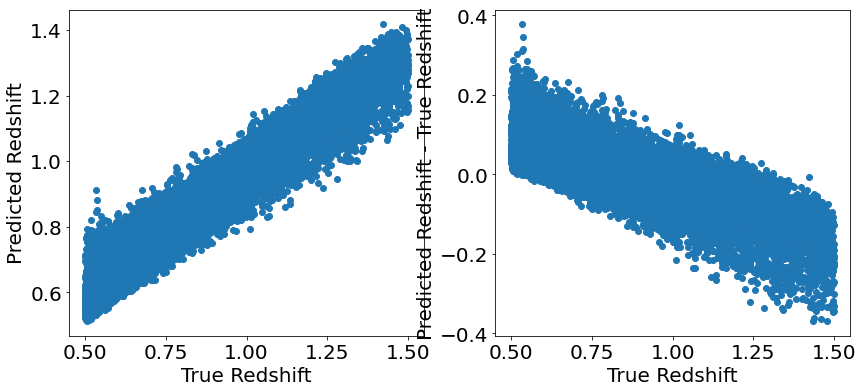

In [58]:
# look at how well the model predicts the traing data
y_train_predict = random_forest_model.predict(X_train)

plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.plot(y_train,y_train_predict,'o')
plt.ylabel('Predicted Redshift')
plt.xlabel('True Redshift')
plt.subplot(1,2,2)
plt.plot(y_train,y_train_predict-y_train,'o')
plt.ylabel('Predicted Redshift - True Redshift')
plt.xlabel('True Redshift')


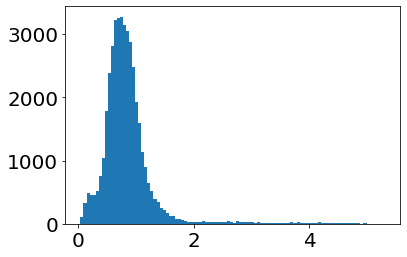

In [49]:
n,bins,patches = plt.hist(y_train_predict,bins=100)